<a href="https://colab.research.google.com/github/iaglourenco/fiap-tech-challenges/blob/main/Tech_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge - Fase 1

## O problema

Você é um(a) profissional encarregado(a) de desenvolver um modelo
preditivo de regressão para prever o valor dos custos médicos individuais
cobrados pelo seguro de saúde.
A base de dados para este desafio pode ser algo como o demonstrado no
exemplo a seguir:

```
idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.88976
3423336
46,masculino,25.857394655216346,1,não,nordeste,26650.7026
46642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.0379
9039332
```
Você precisa apenas alimentá-la com mais informações ou utilizar outra
de sua preferência.

## Tarefas
### Exploração de dados
- Carregue a base de dados e explore suas características;
- Analise estatísticas descritivas e visualize distribuições relevantes.

### Pré-processamento de dados
- Realize a limpeza dos dados, tratando valores ausentes (se
necessário);
- Converta variáveis categóricas em formatos adequados para
modelagem.

### Modelagem

- Crie um modelo preditivo de regressão utilizando uma técnica à sua
escolha (por exemplo: Regressão Linear, Árvores de Decisão etc);
- Divida o conjunto de dados em conjuntos de treinamento e teste.

### Treinamento e avaliação do modelo
- Treine o modelo com o conjunto de treinamento.

### Validação e estatística

- Utilize métricas estatísticas para validar a eficácia do modelo (p-value,
intervalos de confiança).

### O que avaliaremos
- Apresente resultados visuais, como gráficos de previsões vs. valores
reais;
- Elabore um relatório que inclua uma análise dos resultados, insights
obtidos e validação estatística.

### Observações
- Esperamos que o modelo seja capaz de fazer previsões confiáveis dos
custos médicos individuais com base nas características fornecidas.

## Entregável

Como entregável, o grupo deve enviar um vídeo junto com o link do github
do projeto e o código desenvolvido, apresentando o passo a passo do que foi
utilizado, como a fonte de dados e como os modelos foram criados.

O vídeo deve estar disponível em uma plataforma como Youtube e deve
conter até **10 minutos no máximo**.

Qualquer dúvida, não deixe de nos chamar no Discord, lá poderemos tirar
suas dúvidas e auxiliar nesta tarefa. Boa sorte!


# Base de dados escolhida
Medical Insurance Cost Prediction: https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction

In [7]:
# Exploração de dados
import pandas as pd

df = pd.read_csv('./medical_insurance.csv')
df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


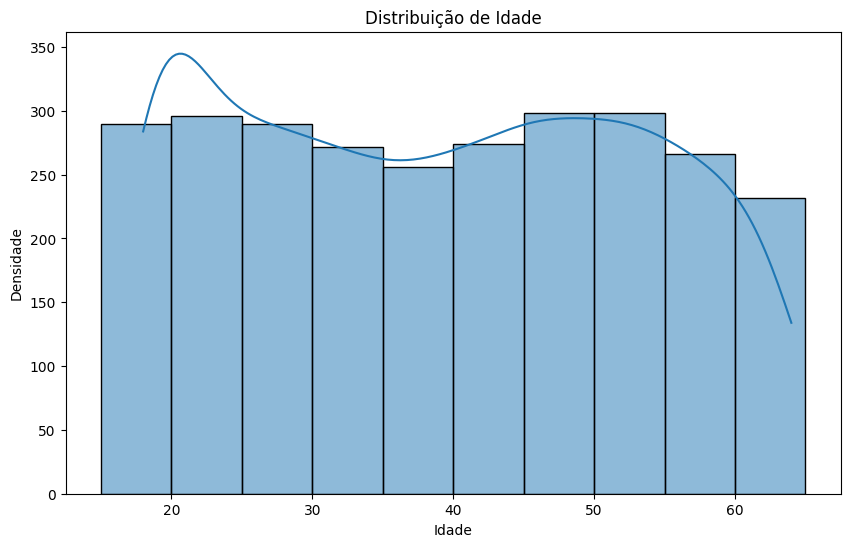

In [9]:
# Análise da base de dados
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'],bins=range(15,70,5),kde=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

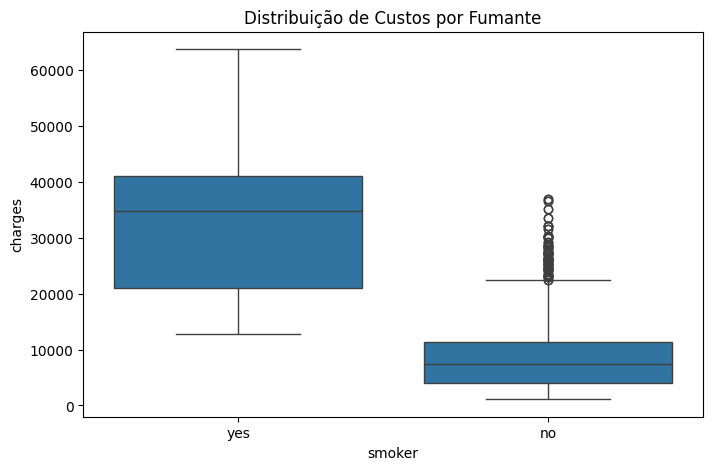

In [10]:
# Distribuição de custos medicos por fumante ou não
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Distribuição de Custos por Fumante')
plt.show()

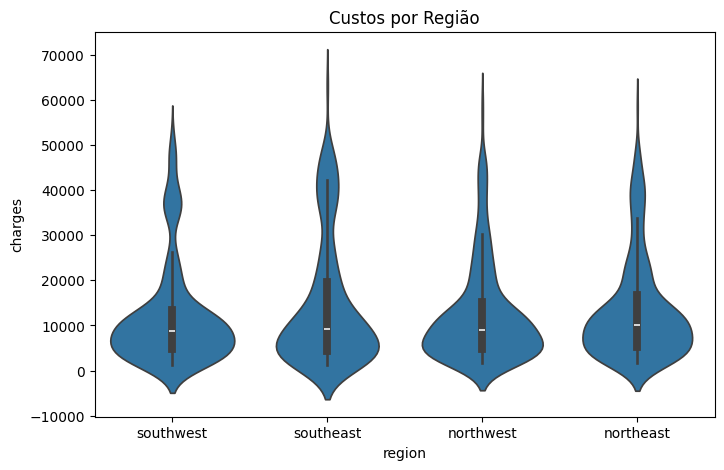

In [11]:
plt.figure(figsize=(8,5))
sns.violinplot(x='region', y='charges', data=df)
plt.title('Custos por Região')
plt.show()

In [12]:
# Pré-processamento de dados

# Convertendo variáveis categóricas para numéricas e aplicando One-Hot Encoding nas regiões
# Codificação
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

X = df.drop('charges', axis=1)
y = df['charges']

In [30]:
# Modelagem, treinamento e avaliação do modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


modelos = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

resultados = {}

# Treinamento dos modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)  # Treina o modelo
    y_pred = modelo.predict(X_test)  # Faz previsões
    mae = mean_absolute_error(y_test, y_pred)  # Calcula o MAE
    mse = mean_squared_error(y_test, y_pred)  # Calcula o MSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calcula o RMSE
    r2 = r2_score(y_test, y_pred)  # Calcula o R²


    # Armazena os resultados
    resultados[nome] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
    }


In [31]:
# Validação e estatística
for nome, resultados in resultados.items():
    print(f"{nome}:")
    for metrica, valor in resultados.items():
        print(f"{metrica}: {valor}")
    print()




Random Forest:
MAE: 1343.4602320514418
MSE: 8023757.847386812
RMSE: 2832.623845021928
R²: 0.9477214763641204

Linear Regression:
MAE: 4160.24797476299
MSE: 39933194.54805148
RMSE: 6319.27167860755
R²: 0.73981661775643

Decision Tree:
MAE: 585.8164058198198
MSE: 7803433.33319332
RMSE: 2793.4626063710466
R²: 0.9491569933054224

KNN:
MAE: 5724.272355404684
MSE: 89729299.02098241
RMSE: 9472.55504185552
R²: 0.4153717785455002

SVR:
MAE: 8292.148536039402
MSE: 164383325.64015517
RMSE: 12821.206091478101
R²: -0.0710340140215171

